### Cargo Librerias




## Data Science 2021 - Presentación Churnless - Mayo 2022

<div>
    <img src="cneos_banner.png"/>
<div>

### 
---
 Presentación de :

 Leandro Scquizzato, lscquizzato@gmail.com

---

## Imports de Librerías

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
#import matplotlib as mplimport seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from scipy import stats
from statistics import mode
from sklearn import metrics

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importamos el modelo ARIMA de statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
# Seteos globales de warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
# Opción de Pandas para visualizar todas las columnas
pd.set_option('display.max_columns', None)

## Funciones

### Función para evaluar resultados

In [14]:
# Evaluation function
# ==============================================================================
def evaluation(y_true, y_pred, y_proba=[], verbose=0):
    
    if verbose == 1:
        # Print Accuracy, Recall, F1 Score, and Precision metrics.
       # print('Evaluation Metrics:')
       #print('Accuracy:   ' + str(metrics.accuracy_score(y_true, y_pred)))
        #print('Recall:     ' + str(metrics.recall_score(y_true, y_pred)))
       # print('F1 Score:   ' + str(metrics.f1_score(y_true, y_pred)))
        #print('Precision:  ' + str(metrics.precision_score(y_true, y_pred)))
        #if y_proba == []:
       #     print('ROC_AUC:    ' + str(metrics.roc_auc_score(y_true, y_pred)))
       # else:
       #     print('ROC_AUC:    ' + str(metrics.roc_auc_score(y_true, y_proba)))
        
        
        print('MAE = {}'.format(metrics.mean_absolute_error(y_true, y_pred)))
        print('RMSD = {}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))
        print('MAPE = {}'.format(metrics.mean_absolute_percentage_error(y_true, y_pred)))
        
        # Print Confusion Matrix
        #print('\nConfusion Matrix:')
        #print('   TN   FP   FN   TP')
        #conf_mat = metrics.confusion_matrix(y_true, y_pred)
        #print(conf_mat.ravel())
        #print()
        #conf_mat_df = pd.DataFrame(data=conf_mat,
         #                          index=['Actual Negative: 0', 'Actual Positive: 1'],
        #                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
        
        #sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
                
    #Accuracy = metrics.accuracy_score(y_true, y_pred).round(3)
    #Recall = metrics.recall_score(y_true, y_pred).round(3)
    #F1_Score = metrics.f1_score(y_true, y_pred).round(3)
    #Precision = metrics.precision_score(y_true, y_pred).round(3)
    #if y_proba == []:
     #   Roc_auc = metrics.roc_auc_score(y_true, y_pred).round(3)        
    else:
       # Roc_auc = metrics.roc_auc_score(y_true, y_proba).round(3)
        
        MAE = metrics.mean_absolute_error(y_true, y_pred).round(3)
        RMSD = np.sqrt(metrics.mean_squared_error(y_true, y_pred)).round(3)
        MAPE= metrics.mean_absolute_percentage_error(y_true, y_pred).round(3)
    
        final = []
    #final.append(Accuracy)
    #final.append(Recall)
    #final.append(F1_Score)
    #final.append(Precision)
    #final.append(Roc_auc)
        final.append(MAE)
        final.append(RMSD)
        final.append(MAPE)
    #cm = metrics.confusion_matrix(y_true, y_pred)
    #for t in cm[0]:
    #    final.append(t)
    #for t in cm[1]:
    #    final.append(t)
    
        return final

### Función Limpieza de Ouliers, devuelve un array de bool con los "no outliers"


In [15]:
# Función para remover outliers, datapd es el array de panda y columna es la columna de la que queremos retirar los outliers.
# Está medio copiado de la clase 12, con el agregado de la posibilidad de pasarle dos valores extremos, un max y un min como
# límites de descarte de datos, elimina mayores que max y menores que min.
# Devuelve array con bool de los no outliers
# Parámetros
# datapd: dataset de pandas 
# columna: columna del dataset
# hab_Q3Q1: Si es False no ejecuta lógica de Cuartiles, Si es True la ejecuta
# max: el valor máximo de la columna
# min: el valor mínimo de la columna
# El max y el min los considera tanto si hab_Q3Q1 es True como False
# ==============================================================================

def remover_outliers(datapd, columna, hab_Q3Q1=False, max=100000.0, min=0.0):
    
    if hab_Q3Q1 == True:
        q1 = datapd[columna].quantile(0.25)
        #print('q1:', q1.round(2))
        q2 = datapd[columna].quantile(0.5)
        #print('q2:', q2.round(2))
        q3 = datapd[columna].quantile(0.75)
        #print('q3:', q3.round(2))
        iqr = (q3 - q1.round(2)) * 4 #!!! OJO CAMBIADO este valor de 1.5 !!!
        up_threshold = q3 + iqr
        low_threshold = q1 - iqr
        if low_threshold < min:
            low_threshold = min
        if up_threshold > max:
            up_threshold = max
    if hab_Q3Q1 != True:
        low_threshold = min
        up_threshold = max
    
    
    #print('up_threshold:', round(up_threshold,2))
    #print('low_threshold:', round(low_threshold,2))
    outlier_mask_up = datapd[columna] > up_threshold
    outlier_mask_down = datapd[columna] < low_threshold
    outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
    not_outliers = np.logical_not(outlier_mask)
    #data_pd_sin_outliers = datapd[not_outliers]
    #return data_pd_sin_outliers
    return not_outliers

## Función para realizar Dick Fuller y verificar si es estacionario. Si p-value es menor que 0,5  es estacionaria

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,8))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['MW'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

## Función Cálculo error cuadrático medio

In [17]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

## Lectura de Dataset

In [18]:
df = pd.read_csv("../Data/train_sample.csv")

df

,Datetime,MW
0,7/24/18 23:00,3476
1,7/24/18 22:00,3720
2,7/24/18 21:00,3766
3,7/24/18 20:00,3851
4,7/24/18 19:00,3954
...,...,...
57517,1/1/12 5:00,2279
57518,1/1/12 4:00,2313
57519,1/1/12 3:00,2364
57520,1/1/12 2:00,2465


## Busqueda de duplicados

In [19]:
df[df.Datetime.duplicated(keep=False)]

,Datetime,MW
6284,11/5/17 2:00,2064
6285,11/5/17 2:00,1044
15020,11/6/16 2:00,2350
15021,11/6/16 2:00,2198
23924,11/1/15 2:00,2164
23925,11/1/15 2:00,2257
32660,11/2/14 2:00,2518
32661,11/2/14 2:00,2562


In [20]:
#Se encuentran 4 valores duplicados. los borramos y vemos que no estan
# ==============================================================================

df.drop_duplicates(subset=['Datetime'],keep="last",inplace=True)

In [21]:
df[df.Datetime.duplicated(keep=False)]

,Datetime,MW


## Conversión de string a Datetime y set como índice

In [22]:
df = df.set_index('Datetime')
df.index=df.index.map(lambda x : datetime.strptime(x,"%m/%d/%y %H:%M"))
df

,MW
Datetime,
2018-07-24 23:00:00,3476
2018-07-24 22:00:00,3720
2018-07-24 21:00:00,3766
2018-07-24 20:00:00,3851
2018-07-24 19:00:00,3954
...,...
2012-01-01 05:00:00,2279
2012-01-01 04:00:00,2313
2012-01-01 03:00:00,2364


## Ajustes varios, busqueda de nulls, verificación de orden, uso de describe para buscar valores muy locos


In [23]:
df.sort_values('Datetime', inplace=True)

In [24]:
df.isnull().sum()

MW    0
dtype: int64

## En base al describe no hay valores obviamente erroneos

In [25]:
df.describe()

,MW
count,57518.000000
mean,3104.043708
std,599.622761
min,907.000000
25%,2687.000000
50%,3012.000000
75%,3447.000000
max,5445.000000


In [26]:
### Densidad Distribución de valores, impresiona adecuada
# ==============================================================================

In [ ]:
df.plot(kind='kde')

### Resample para obtenet dato diario con la media

In [17]:
df_resample = pd.DataFrame(df['MW'].resample('1D').mean())

df_resample

,MW
Datetime,
2012-01-01,2629.913043
2012-01-02,3179.875000
2012-01-03,3503.375000
2012-01-04,3470.541667
2012-01-05,3210.125000
...,...
2018-07-20,3180.625000
2018-07-21,2880.458333
2018-07-22,3011.500000


In [18]:
x=df_resample[df_resample["MW"].isnull()]
x

,MW
Datetime,


## Me aseguro que no quden Null

In [19]:
df_resample.dropna()

,MW
Datetime,
2012-01-01,2629.913043
2012-01-02,3179.875000
2012-01-03,3503.375000
2012-01-04,3470.541667
2012-01-05,3210.125000
...,...
2018-07-20,3180.625000
2018-07-21,2880.458333
2018-07-22,3011.500000


#### Grafico de los valores, no se vé tendencia si aparece un componente estacional

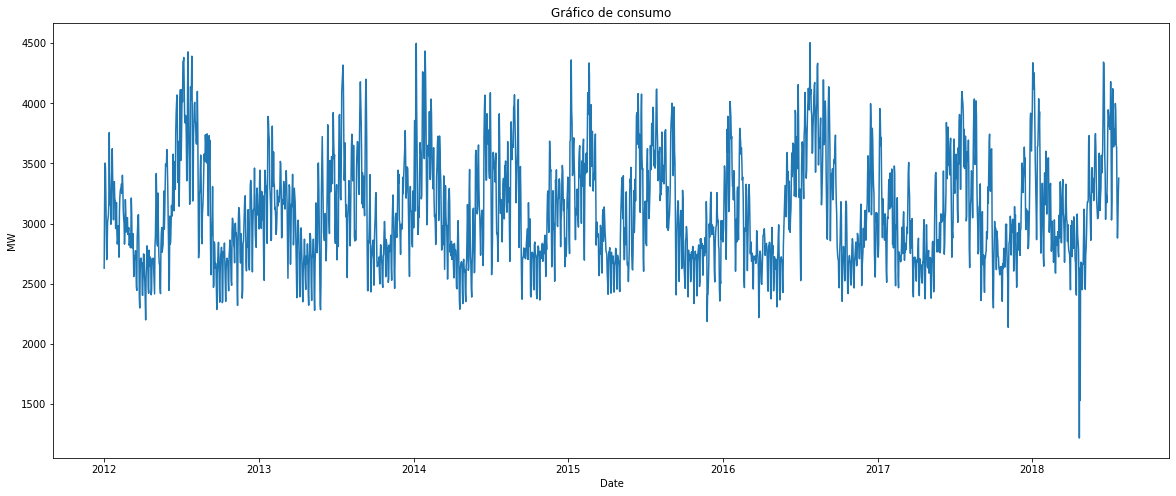

In [20]:
plt.figure(figsize=(20,8))
plt.xlabel("Date")
plt.ylabel("MW")
plt.title("Gráfico de consumo")
plt.plot(df_resample)

## Se confirma que no hay tendencia y Hay un componente estacional

<Figure size 1152x2880 with 0 Axes>

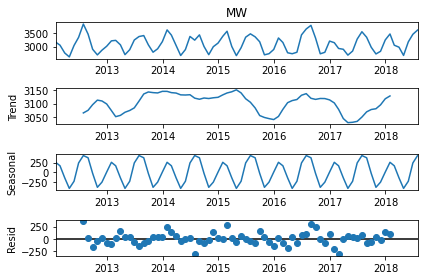

In [21]:
y = df['MW'].resample('1M').mean()


import statsmodels.api as sm
plt.figure(figsize=(16,40))
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

## Verifico que el P-vaue es menor que 0,5 con lo cual es estacionaria adicionalmente no se detecta tendencia en la varianza. Sigue pareciendo estacional.

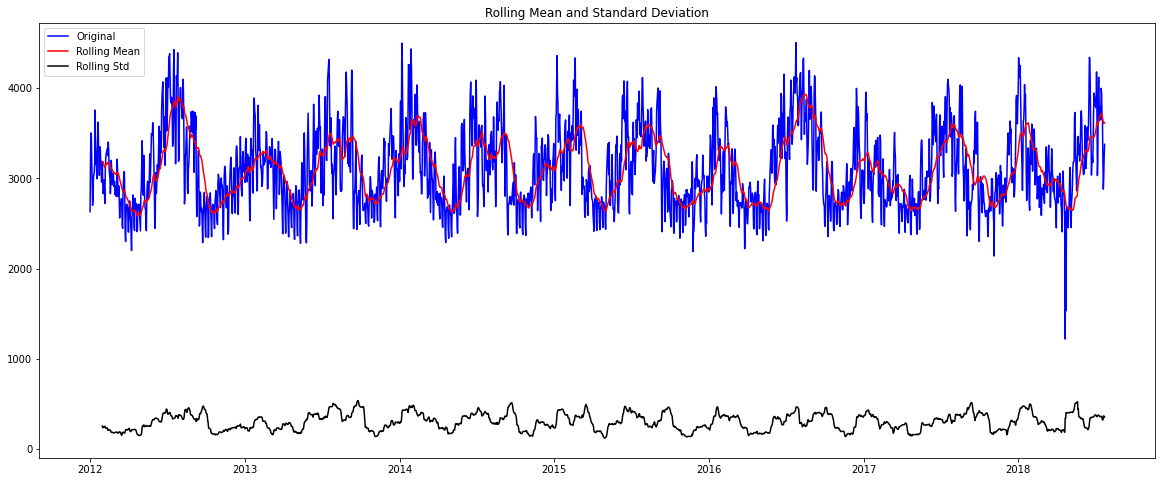

Results of dickey fuller test
Test Statistics                  -4.707432
p-value                           0.000081
No. of lags used                 27.000000
Number of observations used    2369.000000
critical value (1%)              -3.433113
critical value (5%)              -2.862761
critical value (10%)             -2.567420
dtype: float64


In [22]:

test_stationarity(df_resample)

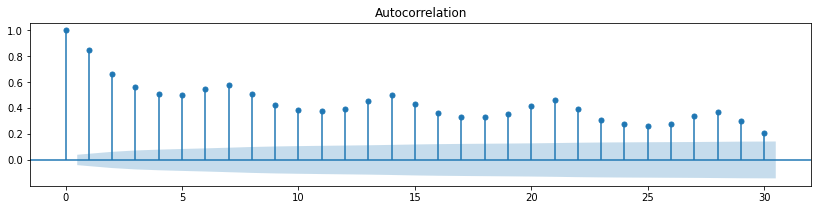

In [23]:
# Autocorrelation plot de la variable, muchos puntos con alta autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(14, 3))
plot_acf(df_resample.MW, ax=ax, lags=30)
plt.show()

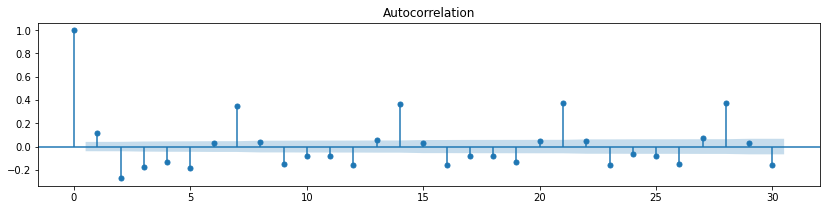

In [24]:
# Autocorrelation plot de la primer diferencía, mejoró 
# ==============================================================================
df_diff=df_resample.diff().dropna()
fig, ax = plt.subplots(figsize=(14, 3))
plot_acf(df_diff.MW, ax=ax, lags=30)
plt.show()

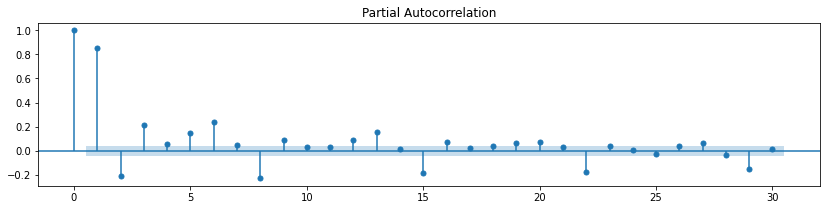

In [25]:
# Autocorrelación, vemos similar tendencia que en la auto correlación.
# ==============================================================================

fig, ax = plt.subplots(figsize=(14, 3))
plot_pacf(df_resample.MW, ax=ax, lags=30)
plt.show()

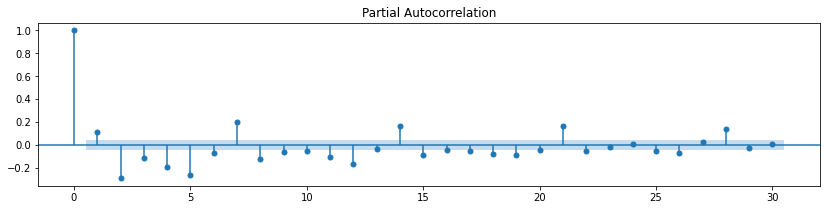

In [26]:
# Partial autocorrelation plot de la diferencia
# ==============================================================================

fig, ax = plt.subplots(figsize=(14, 3))
plot_pacf(df_diff.MW, ax=ax, lags=30)
plt.show()

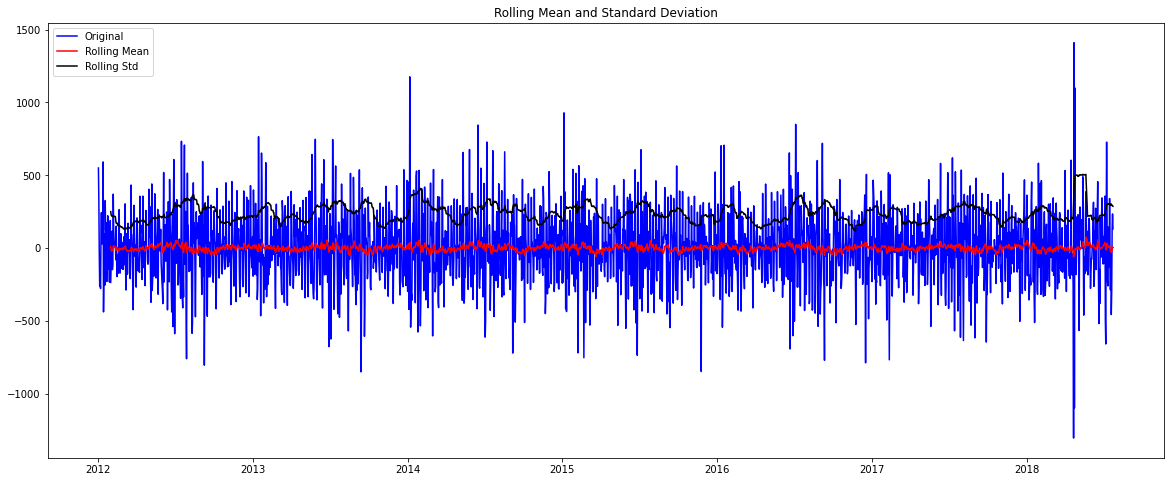

Results of dickey fuller test
Test Statistics               -1.074625e+01
p-value                        2.736999e-19
No. of lags used               2.700000e+01
Number of observations used    2.368000e+03
critical value (1%)           -3.433115e+00
critical value (5%)           -2.862761e+00
critical value (10%)          -2.567420e+00
dtype: float64


In [27]:
#Pruebo Dick folley de la diferencia, da mejor probaré con las 2.
# ==============================================================================
test_stationarity(df_diff)

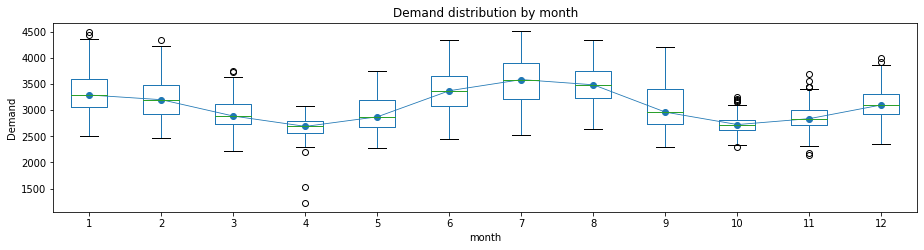

In [28]:
# Boxplot estacionalidad anual
# ==============================================================================
#Impresiona un mayor consumo en julio  y enero, probalemente debido a invierno y verano.

fig, ax = plt.subplots(figsize=(15, 3.5))
df_resample['month'] = df_resample.index.month
df_resample.boxplot(column='MW', by='month', ax=ax,)
df_resample.groupby('month')['MW'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by month')
fig.suptitle('');

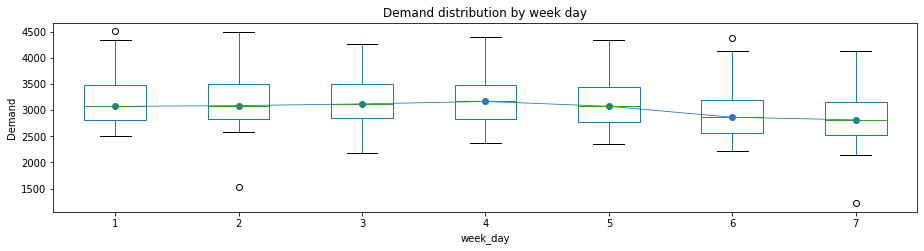

In [29]:
# Boxplot estacionalidad semanal.
# ==============================================================================
#Bastante parejo para todos los días cae, levemente sábado y domingo.

fig, ax = plt.subplots(figsize=(15, 3.5))
df_resample['week_day'] = df_resample.index.day_of_week + 1
df_resample.boxplot(column='MW', by='week_day', ax=ax)
df_resample.groupby('week_day')['MW'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by week day')
fig.suptitle('');

### Modelo baseline Regresión 

In [30]:
# Generamos nuevas variables
# ==============================================================================

df_resample = pd.DataFrame(df['MW'].resample('1D').mean())
df_resample["timeIndex"] = pd.Series(np.arange(len(df_resample['MW'])), index=df_resample.index)
df_resample['log_value'] = np.log(df_resample['MW'])

df_resample['month'] = [d.strftime('%b') for d in df_resample.index]
dummies_mes = pd.get_dummies(df_resample['month'])
df_resample = df_resample.join(dummies_mes)

In [31]:
df_resample.head(3)

,MW,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Datetime,,,,,,,,,,,,,,,,
2012-01-01,2629.913043,0,7.874706,Jan,0,0,0,0,1,0,0,0,0,0,0,0
2012-01-02,3179.875000,1,8.064597,Jan,0,0,0,0,1,0,0,0,0,0,0,0
2012-01-03,3503.375000,2,8.161482,Jan,0,0,0,0,1,0,0,0,0,0,0,0


Creamos el modelo sobre train, y predecimos el valor (el log de la serie 'model_log_est').

Luego generamos el back transformation 'back_model_log_est', con una función exponencial.

In [32]:
# Dividimos en train y test
# ==============================================================================

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_resample, test_size=365, random_state=42, shuffle=False)

In [33]:
model_log_est = smf.ols( \
    'log_value ~ timeIndex + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
    data = df_train).fit()

In [34]:
df_train['model_log_est'] = model_log_est.predict(
    df_train[["timeIndex", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict(  
    df_test[["timeIndex", "Aug", "Dec", "Feb", "Jan","Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])

In [35]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

In [36]:
df_train

,MW,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,model_log_est,back_model_log_est
Datetime,,,,,,,,,,,,,,,,,,
2012-01-01,2629.913043,0,7.874706,Jan,0,0,0,0,1,0,0,0,0,0,0,0,8.097623,3286.645615
2012-01-02,3179.875000,1,8.064597,Jan,0,0,0,0,1,0,0,0,0,0,0,0,8.097625,3286.651861
2012-01-03,3503.375000,2,8.161482,Jan,0,0,0,0,1,0,0,0,0,0,0,0,8.097627,3286.658108
2012-01-04,3470.541667,3,8.152066,Jan,0,0,0,0,1,0,0,0,0,0,0,0,8.097628,3286.664354
2012-01-05,3210.125000,4,8.074065,Jan,0,0,0,0,1,0,0,0,0,0,0,0,8.097630,3286.670600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-20,4034.208333,2027,8.302565,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165385,3517.076844
2017-07-21,3997.125000,2028,8.293331,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165387,3517.083528
2017-07-22,3906.083333,2029,8.270290,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165389,3517.090212


Verificamos analíticamente la performance del modelo.

In [37]:
evalu=evaluation(df_test['back_model_log_est'], df_test['MW'],verbose=0)

In [38]:
df_Results = pd.DataFrame(columns = ["Model", "RMSE","MAPE","MAE"])
df_Results.loc[0, "Model"] = "Regresión"
df_Results.loc[0, "RMSE"] = evalu[0]
df_Results.loc[0, "MAE"] = evalu[1]
df_Results.loc[0, "MAPE"] = evalu[2]

df_Results

,Model,RMSE,MAPE,MAE
0,Regresión,285.793,0.092,366.614


### Modelo baseline Media 

In [39]:
df_test["Mean_est"]=df_train["MW"].mean()

In [40]:
df_test

,MW,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,model_log_est,back_model_log_est,Mean_est
Datetime,,,,,,,,,,,,,,,,,,,
2017-07-25,3458.916667,2032,8.148711,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165395,3517.110265,3099.498853
2017-07-26,3553.958333,2033,8.175817,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165397,3517.116950,3099.498853
2017-07-27,3727.750000,2034,8.223560,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165399,3517.123634,3099.498853
2017-07-28,3635.416667,2035,8.198479,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165401,3517.130318,3099.498853
2017-07-29,3022.791667,2036,8.013936,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.165403,3517.137003,3099.498853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-20,3180.625000,2392,8.064833,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.166079,3519.517464,3099.498853
2018-07-21,2880.458333,2393,7.965705,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.166081,3519.524153,3099.498853
2018-07-22,3011.500000,2394,8.010194,Jul,0,0,0,0,0,1,0,0,0,0,0,0,8.166083,3519.530842,3099.498853


In [41]:
evalu=evaluation(df_test['Mean_est'], df_test['MW'],verbose=0)

In [42]:

df_Results.loc[1, "Model"] = "Media"
df_Results.loc[1, "RMSE"] = evalu[0]
df_Results.loc[1, "MAE"] = evalu[1]
df_Results.loc[1, "MAPE"] = evalu[2]

df_Results

,Model,RMSE,MAPE,MAE
0,Regresión,285.793,0.092,366.614
1,Media,357.384,0.115,451.782


### Modelo ARIMA

In [43]:

df_resample = pd.DataFrame(df['MW'].resample('1D').mean())


from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_resample, test_size=365, random_state=42, shuffle=False)


In [44]:
df_train

,MW
Datetime,
2012-01-01,2629.913043
2012-01-02,3179.875000
2012-01-03,3503.375000
2012-01-04,3470.541667
2012-01-05,3210.125000
...,...
2017-07-20,4034.208333
2017-07-21,3997.125000
2017-07-22,3906.083333


In [45]:
df_test

,MW
Datetime,
2017-07-25,3458.916667
2017-07-26,3553.958333
2017-07-27,3727.750000
2017-07-28,3635.416667
2017-07-29,3022.791667
...,...
2018-07-20,3180.625000
2018-07-21,2880.458333
2018-07-22,3011.500000


Generamos los plot ACF y PACF sobre la serie, con un número de rezagos (lags) suficiente para determinar p y q.

En nuestro ejemplo, *ACF cae en forma exponencial* y *PACF tiene dos picos significativos* .

Por lo tanto asumimos $p = 2$ y $q = 0$. También podemos considerar  $p = 2$ y $q = 2$.

In [46]:
df_train

,MW
Datetime,
2012-01-01,2629.913043
2012-01-02,3179.875000
2012-01-03,3503.375000
2012-01-04,3470.541667
2012-01-05,3210.125000
...,...
2017-07-20,4034.208333
2017-07-21,3997.125000
2017-07-22,3906.083333


In [47]:
df_test

,MW
Datetime,
2017-07-25,3458.916667
2017-07-26,3553.958333
2017-07-27,3727.750000
2017-07-28,3635.416667
2017-07-29,3022.791667
...,...
2018-07-20,3180.625000
2018-07-21,2880.458333
2018-07-22,3011.500000


### Uso un modelo ARIMA, quise usar un modelo estacional SARIMAX, pero no me dio el Hardware, des`pues de unas horas no habia terminado.

In [48]:
df_arima=pd.DataFrame(df_train["MW"])

model_ARIMA = ARIMA(df_arima, order=(5, 1, 7))
results_ARIMA = model_ARIMA.fit()

In [49]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                 2031
Model:                 ARIMA(5, 1, 7)   Log Likelihood              -13509.214
Method:                       css-mle   S.D. of innovations            186.752
Date:                Mon, 16 May 2022   AIC                          27046.428
Time:                        13:37:02   BIC                          27125.056
Sample:                    01-02-2012   HQIC                         27075.276
                         - 07-24-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7040      3.132      0.225      0.822      -5.436       6.844
ar.L1.D.MW    -0.1709        nan        nan        nan         nan         nan
ar.L2.D.MW    -0.6653      0.000  -2587.278      0.0

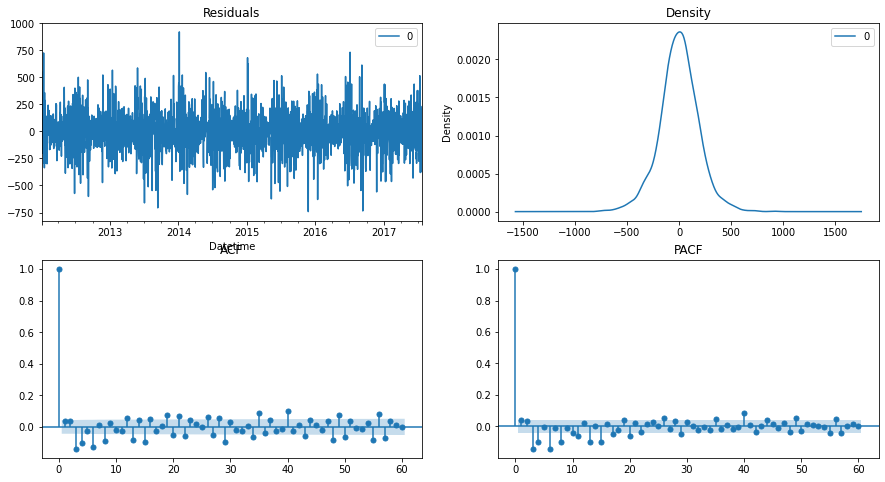

In [50]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(15,8))

residuals.plot(title="Residuals", ax=axes[0,0]); 
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=60,ax=axes[1,0],title='ACF'); 
smt.graphics.plot_pacf(residuals, lags=60,ax=axes[1,1],title='PACF')
plt.show()

In [51]:
predictions_ARIMA , se, conf = results_ARIMA.forecast(len(df_test['MW']), alpha=0.05)

In [52]:
df_train['model_ARIMA'] =  results_ARIMA.fittedvalues 
                                
df_test['model_ARIMA'] =  predictions_ARIMA

In [53]:
df_train['MW'] =  df_train['MW'] 

In [54]:
df_train

,MW,model_ARIMA
Datetime,,
2012-01-01,2629.913043,NaN
2012-01-02,3179.875000,0.703979
2012-01-03,3503.375000,49.987256
2012-01-04,3470.541667,-157.939400
2012-01-05,3210.125000,-106.407009
...,...,...
2017-07-20,4034.208333,46.319874
2017-07-21,3997.125000,-70.684361
2017-07-22,3906.083333,-213.657342


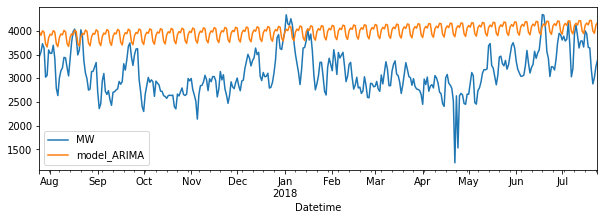

In [55]:
df_test.plot(kind = "line", y = ['MW', 'model_ARIMA'],figsize=(10,3));

In [56]:
evalu=evaluation(df_test['model_ARIMA'], df_test['MW'],verbose=0)

In [57]:

df_Results.loc[2, "Model"] = "ARIMA"
df_Results.loc[2, "RMSE"] = evalu[0]
df_Results.loc[2, "MAE"] = evalu[1]
df_Results.loc[2, "MAPE"] = evalu[2]

df_Results

,Model,RMSE,MAPE,MAE
0,Regresión,285.793,0.092,366.614
1,Media,357.384,0.115,451.782
2,ARIMA,867.513,0.218,959.475


### Los resultados del modelo ARIMA no son los mejores, se podria probar con un SARIMAX (incluso usar la media parece mejor). A pesar de esto y considerando que falta trabajar en el ajuste sigo con la predicción usando el Modelo ARIMA.

In [58]:
df_test

,MW,model_ARIMA
Datetime,,
2017-07-25,3458.916667,3969.288839
2017-07-26,3553.958333,3904.097012
2017-07-27,3727.750000,3999.308175
2017-07-28,3635.416667,3969.255921
2017-07-29,3022.791667,3723.244344
...,...,...
2018-07-20,3180.625000,4215.631272
2018-07-21,2880.458333,3998.368014
2018-07-22,3011.500000,3946.194816


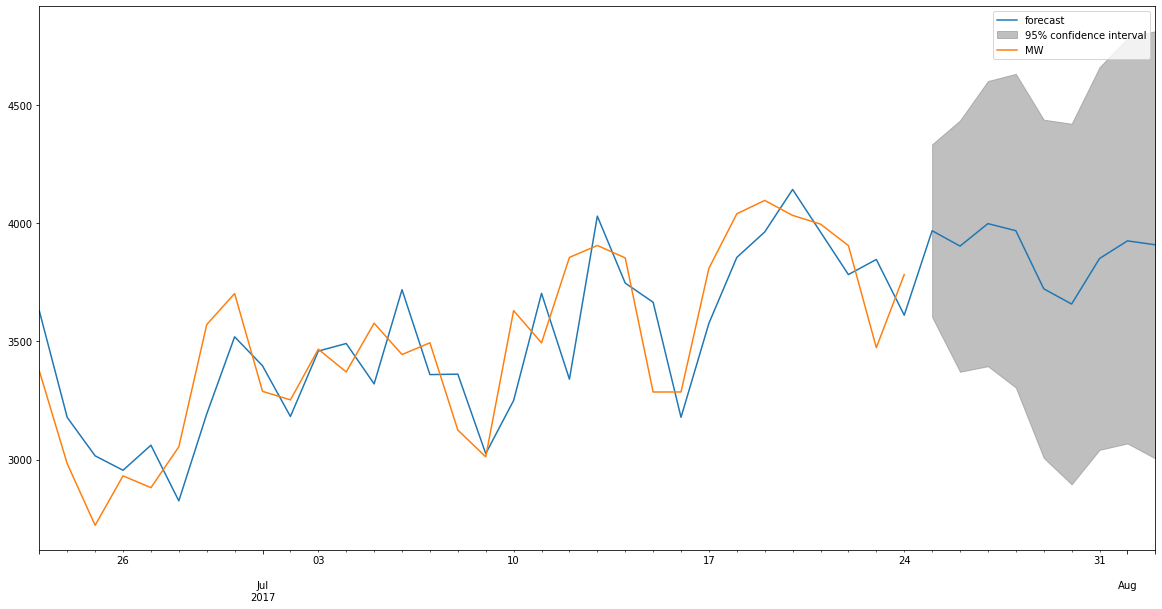

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
results_ARIMA.plot_predict(2000,len(df_train)+8,ax=ax)
x=results_ARIMA.forecast(steps=100)


## Predicción de diás posteriores al último dato (24-7-20128)

In [60]:
df_arima=pd.DataFrame(df_resample["MW"])

model_ARIMA = ARIMA(df_arima, order=(5, 1, 7))
results_ARIMA = model_ARIMA.fit()

In [61]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                 2396
Model:                 ARIMA(5, 1, 7)   Log Likelihood              -16052.213
Method:                       css-mle   S.D. of innovations            196.021
Date:                Mon, 16 May 2022   AIC                          32132.427
Time:                        13:37:35   BIC                          32213.369
Sample:                    01-02-2012   HQIC                         32161.876
                         - 07-24-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3242      3.146      0.103      0.918      -5.842       6.490
ar.L1.D.MW    -0.1866        nan        nan        nan         nan         nan
ar.L2.D.MW    -0.6529      0.001  -1246.624      0.0

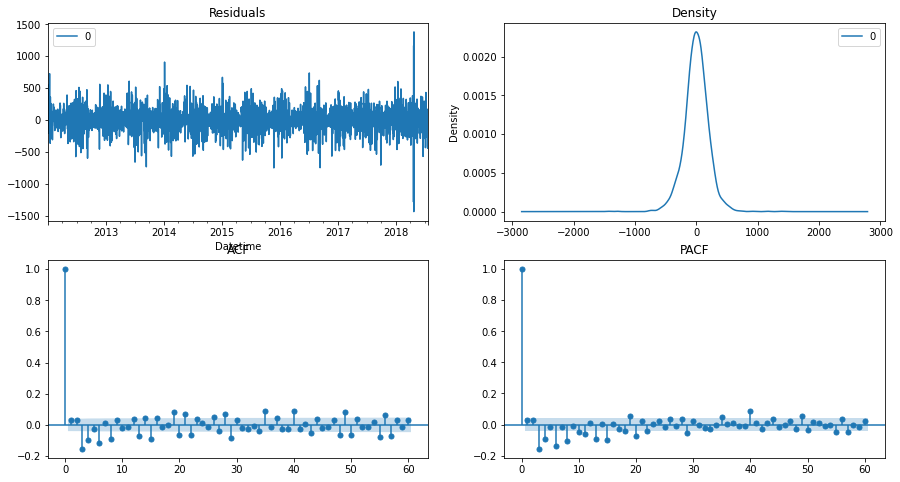

In [62]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(15,8))

residuals.plot(title="Residuals", ax=axes[0,0]); 
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=60,ax=axes[1,0],title='ACF'); 
smt.graphics.plot_pacf(residuals, lags=60,ax=axes[1,1],title='PACF')
plt.show()

In [63]:
predictions_ARIMA , se, conf = results_ARIMA.forecast(len(df_resample['MW']), alpha=0.05)

In [64]:
df_resample['MW'].tail(1).values

array([3377.54166667])

In [65]:
df_resample['MW'].tail(3)

Datetime
2018-07-22    3011.500000
2018-07-23    3246.000000
2018-07-24    3377.541667
Freq: D, Name: MW, dtype: float64

In [66]:
results_ARIMA.predict(len(df_resample),len(df_resample)+8)+df_resample['MW'].tail(1).values

2018-07-25    3325.162185
2018-07-26    3391.110388
2018-07-27    3326.227454
2018-07-28    3156.417136
2018-07-29    3371.012147
2018-07-30    3606.447253
2018-07-31    3463.348873
2018-08-01    3313.881117
2018-08-02    3411.044378
Freq: D, dtype: float64

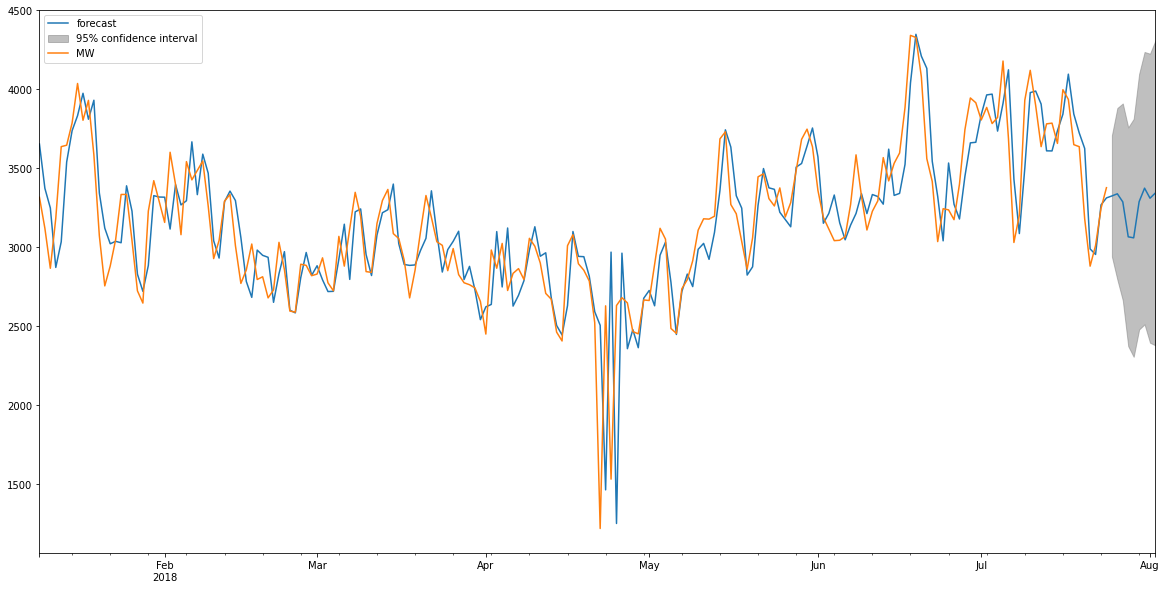

In [67]:
fig, ax = plt.subplots(figsize=(20, 10))
results_ARIMA.plot_predict(2200,len(df_resample)+8,ax=ax)
x=results_ARIMA.forecast(steps=100)


## LSTMs

In [11]:
from sklearn.preprocessing import MinMaxScaler
import math
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

In [391]:
# fix random seed for reproducibility
np.random.seed(7)

In [392]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_resample)

In [393]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1605 792


In [394]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [395]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [396]:
trainX

array([[0.42957252],
       [0.59701625],
       [0.69551042],
       ...,
       [0.45141893],
       [0.44205666],
       [0.37405965]])

In [397]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [398]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 4)                 96        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1603/1603 - 4s - loss: 0.0445 - 4s/epoch - 2ms/step
Epoch 2/10
1603/1603 - 1s - loss: 0.0082 - 1s/epoch - 780us/step
Epoch 3/10
1603/1603 - 1s - loss: 0.0059 - 1s/epoch - 767us/step
Epoch 4/10
1603/1603 - 1s - loss: 0.0052 - 1s/epoch - 777us/step
Epoch 5/10
1603/1603 - 1s - loss: 0.0051 - 1s/epoch - 821us/step
Epoch 6/10
1603/1603 - 1s - loss: 0.0051 - 1s/epoch - 787us/step
Epoch 7/10
1603/1603 - 1s - loss: 0.0050 - 1s/epoch - 767us/ste

In [399]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

In [400]:
evalu=evaluation(testPredict[:,0], testY[0] ,verbose=0)

In [401]:
df_Results.loc[3, "Model"] = "LSTM"
df_Results.loc[3, "RMSE"] = evalu[0]
df_Results.loc[3, "MAE"] = evalu[1]
df_Results.loc[3, "MAPE"] = evalu[2]

df_Results

,Model,RMSE,MAPE,MAE
0,Regresión,285.793,0.092,366.614
1,Media,357.384,0.115,451.782
2,ARIMA,867.513,0.218,959.475
3,LSTM,183.868,0.059,238.958


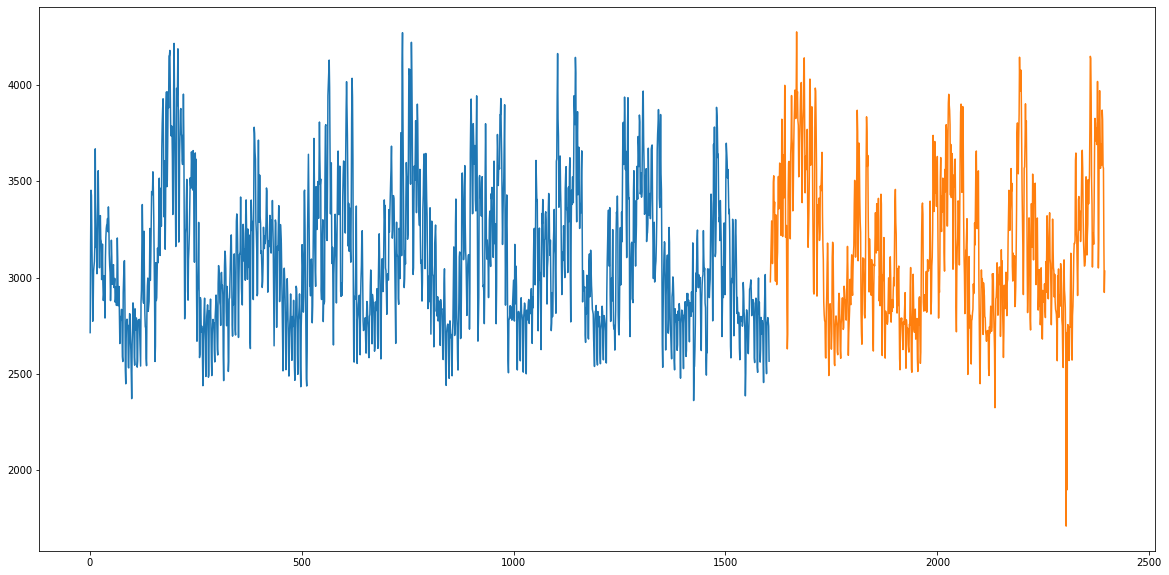

In [402]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(20, 10))
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Forecast con LSTMs

In [450]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_resample)
y = scaler.transform(df_resample)

# generate the input and output sequences
n_lookback = 1  # length of input sequences (lookback period)
n_forecast = 8  # length of output sequences (forecast period)
y.shape

(2397, 1)

In [451]:
X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)
Y.shape

(2389, 8, 1)

In [443]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=32, verbose=2)


Epoch 1/10
75/75 - 4s - loss: 0.1966 - 4s/epoch - 55ms/step
Epoch 2/10
75/75 - 0s - loss: 0.0133 - 167ms/epoch - 2ms/step
Epoch 3/10
75/75 - 0s - loss: 0.0124 - 150ms/epoch - 2ms/step
Epoch 4/10
75/75 - 0s - loss: 0.0121 - 148ms/epoch - 2ms/step
Epoch 5/10
75/75 - 0s - loss: 0.0121 - 148ms/epoch - 2ms/step
Epoch 6/10
75/75 - 0s - loss: 0.0120 - 153ms/epoch - 2ms/step
Epoch 7/10
75/75 - 0s - loss: 0.0119 - 146ms/epoch - 2ms/step
Epoch 8/10
75/75 - 0s - loss: 0.0119 - 243ms/epoch - 3ms/step
Epoch 9/10
75/75 - 0s - loss: 0.0119 - 146ms/epoch - 2ms/step
Epoch 10/10
75/75 - 0s - loss: 0.0118 - 141ms/epoch - 2ms/step


In [468]:
Y

array([[[0.59701625],
        [0.69551042],
        [0.68551385],
        ...,
        [0.45124133],
        [0.47128522],
        [0.54549837]],

       [[0.69551042],
        [0.68551385],
        [0.60622629],
        ...,
        [0.47128522],
        [0.54549837],
        [0.5541756 ]],

       [[0.68551385],
        [0.60622629],
        [0.5356794 ],
        ...,
        [0.54549837],
        [0.5541756 ],
        [0.56361399]],

       ...,

       [[0.74251208],
        [0.8461314 ],
        [0.8274576 ],
        ...,
        [0.5972446 ],
        [0.50585459],
        [0.54575209]],

       [[0.8461314 ],
        [0.8274576 ],
        [0.74016517],
        ...,
        [0.50585459],
        [0.54575209],
        [0.61714895]],

       [[0.8274576 ],
        [0.74016517],
        [0.7362452 ],
        ...,
        [0.54575209],
        [0.61714895],
        [0.65719868]]])

In [462]:
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

In [466]:
 y[- 1] 

array([0.65719868])

In [464]:
X_

array([[[0.65719868]]])

In [465]:
Y_

array([[3307.3303],
       [3271.614 ],
       [3235.1462],
       [3227.2656],
       [3245.9153],
       [3241.826 ],
       [3248.9739],
       [3238.8967]], dtype=float32)

In [445]:
df_past = df_resample[['MW']].reset_index()

df_past.rename(columns={'index': 'Datetime', 'MW': 'Actual'}, inplace=True)
df_past['Datetime'] = pd.to_datetime(df_past['Datetime'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

In [446]:
df_future = pd.DataFrame(columns=['Datetime', 'Actual', 'Forecast'])
df_future['Datetime'] = pd.date_range(start=df_past['Datetime'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan
print(df_future.head(9))

    Datetime  Actual     Forecast
0 2018-07-25     NaN  3307.330322
1 2018-07-26     NaN  3271.614014
2 2018-07-27     NaN  3235.146240
3 2018-07-28     NaN  3227.265625
4 2018-07-29     NaN  3245.915283
5 2018-07-30     NaN  3241.825928
6 2018-07-31     NaN  3248.973877
7 2018-08-01     NaN  3238.896729


In [447]:
results = df_past[2200:].append(df_future).set_index('Datetime')

<AxesSubplot:title={'center':'AAPL'}, xlabel='Datetime'>

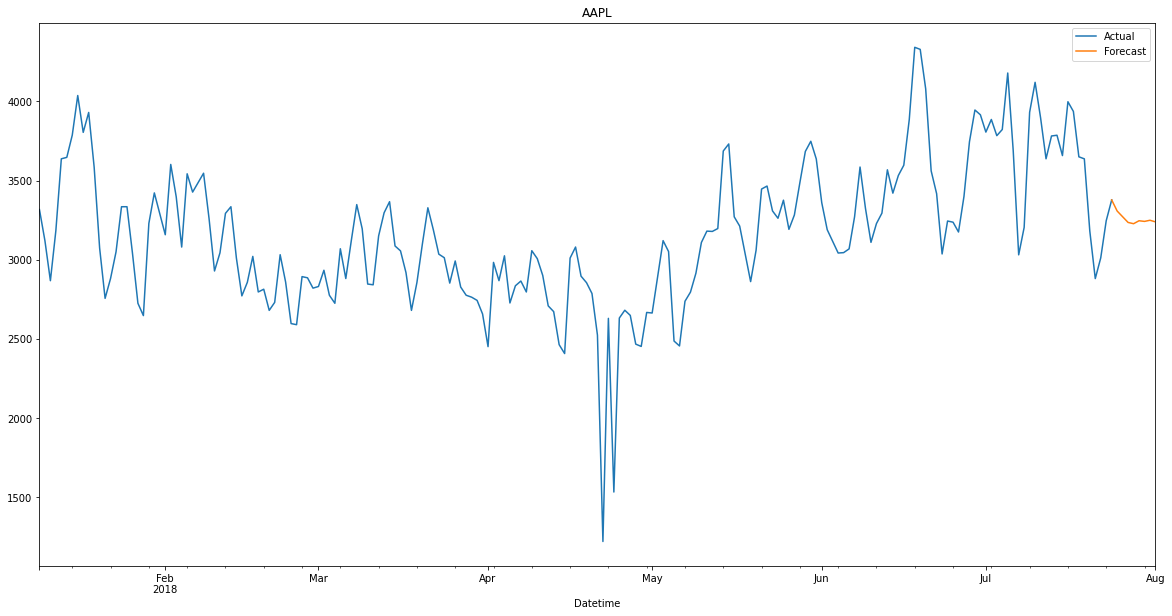

In [448]:
fig, ax = plt.subplots(figsize=(20, 10))
results.plot(title='AAPL',ax=ax)